# BREAST CANCER PREDICTION USING SUPPORT VECTOR MACHINE

### BY: Victor EGBINADE

#### IMPORTING DEPENDENCIES

In [75]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
sns.set_style('whitegrid')
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score


# Loading the data

In [76]:
#getting the data
data = load_breast_cancer()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [77]:
data['DESCR']

'.. _breast_cancer_dataset:\n\nBreast cancer wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 569\n\n    :Number of Attributes: 30 numeric, predictive attributes and the class\n\n    :Attribute Information:\n        - radius (mean of distances from center to points on the perimeter)\n        - texture (standard deviation of gray-scale values)\n        - perimeter\n        - area\n        - smoothness (local variation in radius lengths)\n        - compactness (perimeter^2 / area - 1.0)\n        - concavity (severity of concave portions of the contour)\n        - concave points (number of concave portions of the contour)\n        - symmetry\n        - fractal dimension ("coastline approximation" - 1)\n\n        The mean, standard error, and "worst" or largest (mean of the three\n        worst/largest values) of these features were computed for each image,\n        resulting in 30 features.  For inst

In [78]:
data['feature_names']

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [79]:
## setting up the data frame using pandas
breast_data = pd.DataFrame(data['data'],columns=data['feature_names'])
breast_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

# Data analysis

In [80]:
pd.DataFrame(data['target']).value_counts()

1    357
0    212
Name: count, dtype: int64

##### 1 signifies Benign while  0 represent malignant

In [81]:
breast_data['target']=data.target
breast_data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


##### Data visualization


<Axes: xlabel='target', ylabel='count'>

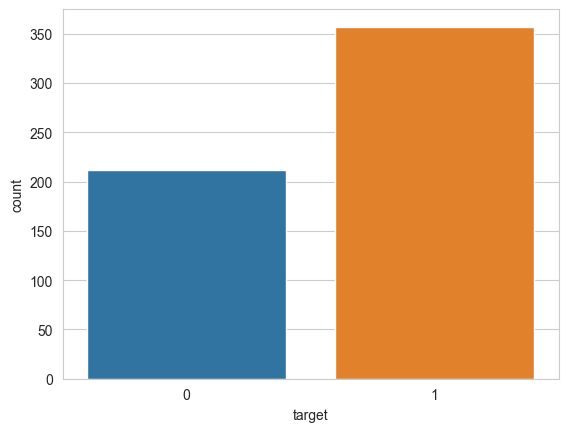

In [82]:
sns.countplot(data= breast_data, x='target' ,label="count")

<Axes: >

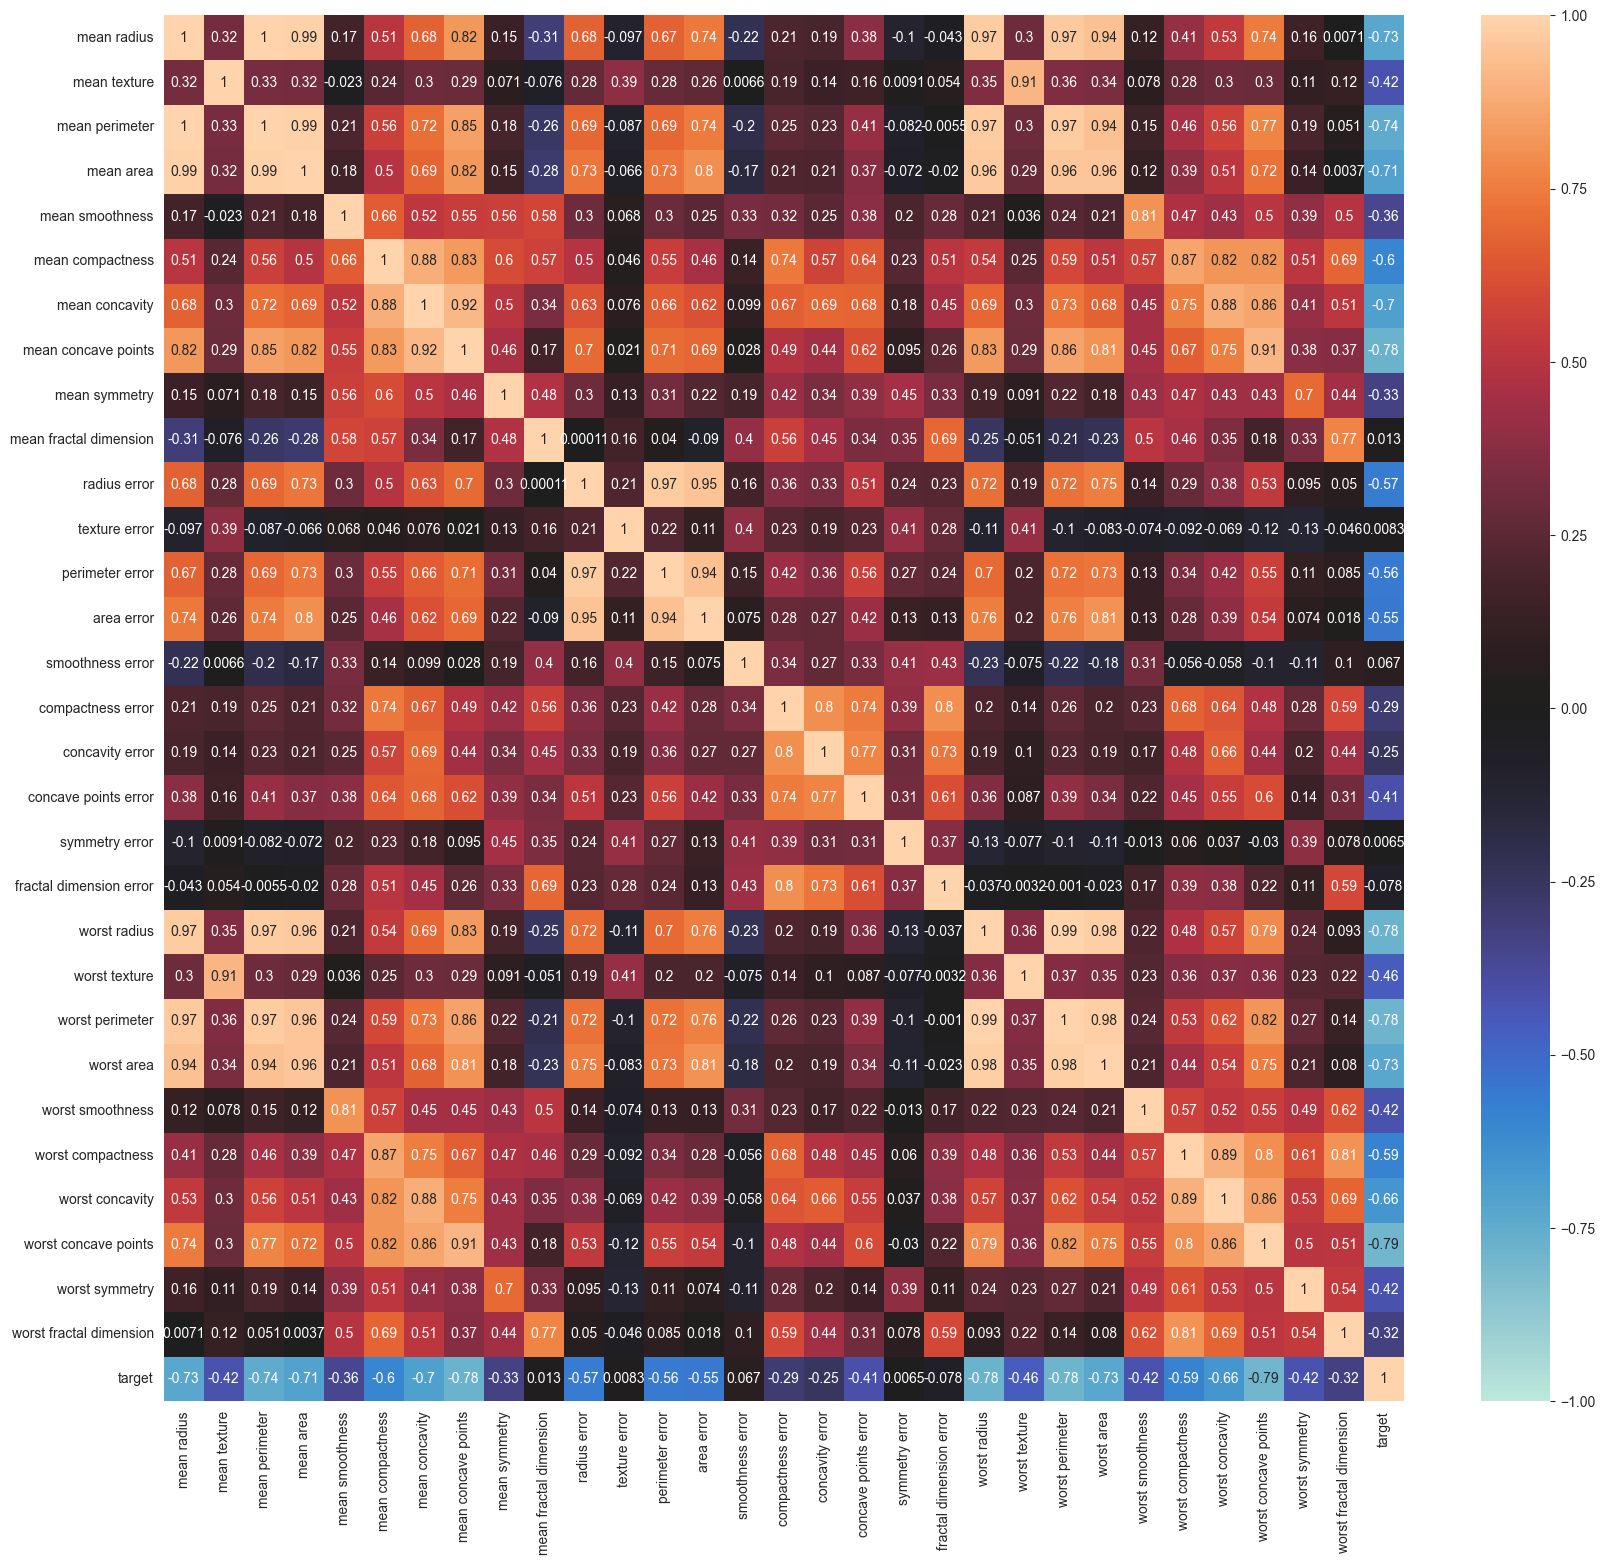

In [83]:
plt.figure(figsize=(20,18))

corr = breast_data.corr()
sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

C:\Users\Masterkim\AppData\Local\Temp\ipykernel_6800\2849285142.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(breast_data['mean concavity'], hist=True, bins=30, color='grey')


Text(0.5, 1.0, 'Distribution of concavity_mean')

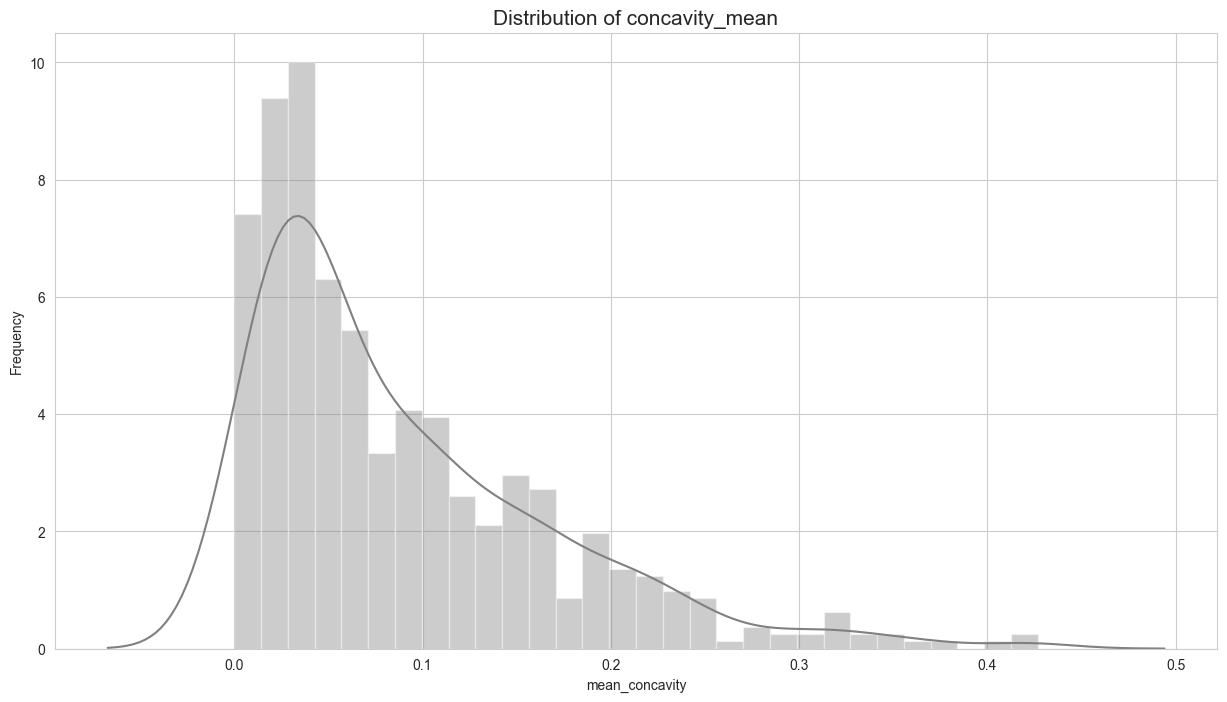

In [84]:
plt.figure(figsize=(15,8))
sns.distplot(breast_data['mean concavity'], hist=True, bins=30, color='grey')
plt.xlabel('mean_concavity')
plt.ylabel('Frequency')
plt.title('Distribution of concavity_mean', fontsize=15)

<Axes: >

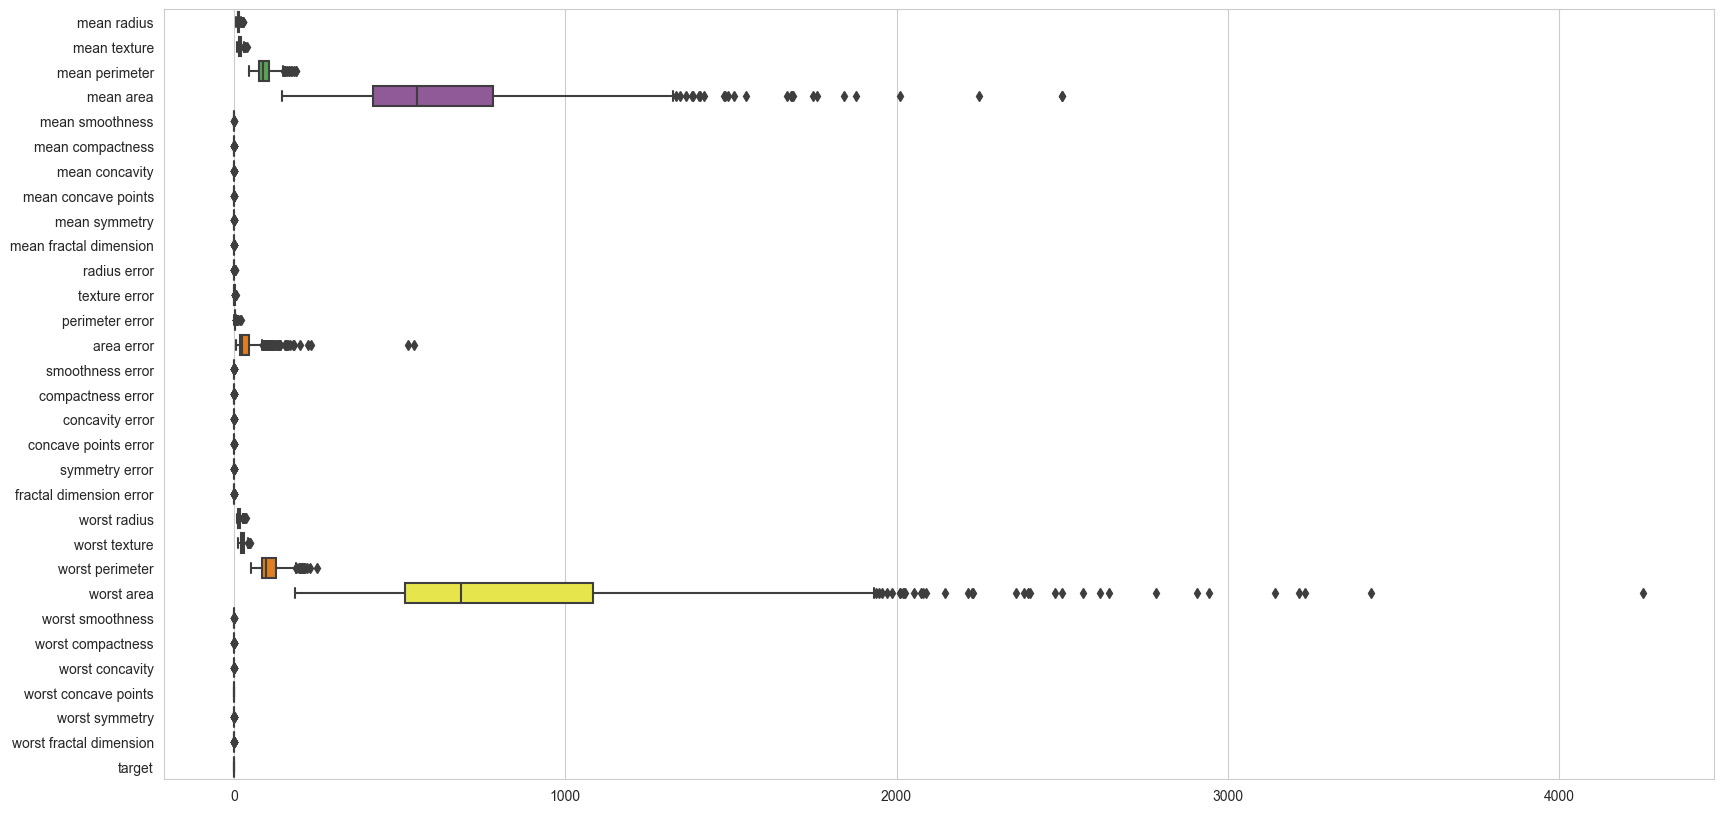

In [85]:
plt.figure(figsize=(20,10))
sns.boxplot(data = breast_data, orient = "h", palette = "Set1")

#### Train test split

In [86]:
from sklearn.model_selection import train_test_split
X= breast_data.drop(['target'], axis=1)
y= breast_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=43)

In [87]:
print(X.shape)
print(X_test.shape)
print(X_train.shape)

(569, 30)
(171, 30)
(398, 30)


# Comparing the performance of the models

In [88]:
List_of_models = [LogisticRegression(max_iter=10000), SVC(kernel='linear'),  RandomForestClassifier()]

In [89]:
def model_comparison():
    for model in List_of_models:
        model.fit(X_train, y_train)

        test_data_prediction = model.predict(X_test)
        accuracy =  accuracy_score(y_test, test_data_prediction)

        print("Accuracy score of the ", model, " is", accuracy)

In [90]:
model_comparison()

Accuracy score of the  LogisticRegression(max_iter=10000)  is 0.9649122807017544
Accuracy score of the  SVC(kernel='linear')  is 0.9590643274853801
Accuracy score of the  RandomForestClassifier()  is 0.9707602339181286


# Cross validation

In [91]:
def model_CV_comparison():
    for model in List_of_models:
        cv_score = cross_val_score(model, X, y, cv=5)

        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy * 100
        mean_accuracy = round(mean_accuracy, 2)

        print("Cros validation accuracies for ", model, ' model  = ', cv_score)
        print("Accuracy % of the ", model, mean_accuracy, '%')
        print("---------------------------------------------")

In [92]:
model_CV_comparison()

Cros validation accuracies for  LogisticRegression(max_iter=10000)  model  =  [0.93859649 0.94736842 0.98245614 0.92982456 0.95575221]
Accuracy % of the  LogisticRegression(max_iter=10000) 95.08 %
---------------------------------------------
Cros validation accuracies for  SVC(kernel='linear')  model  =  [0.94736842 0.92982456 0.97368421 0.92105263 0.95575221]
Accuracy % of the  SVC(kernel='linear') 94.55 %
---------------------------------------------
Cros validation accuracies for  RandomForestClassifier()  model  =  [0.9122807  0.95614035 0.98245614 0.98245614 0.96460177]
Accuracy % of the  RandomForestClassifier() 95.96 %
---------------------------------------------
